In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from satpy import Scene
from glob import glob
import pandas as pd
import numpy as np
import importlib
import aggdraw


import warnings
warnings.filterwarnings('ignore')

In [4]:
def setup_satpy(idir='./Sat_Data/HIM/'):
    """Load and crop a Himawari scene for plotting."""
    from satpy import Scene
    from glob import glob
    
    bbox = (-176.5,
            -21.6, 
            -174,
            -19.7)
    files = glob(idir + '*_0430_*.DAT')
    scn = Scene(files, reader='ahi_hsd')
    scn.load(['B03'])
    scn2 = scn.crop(ll_bbox=bbox)
    crs = scn2['B03'].attrs['area'].to_cartopy_crs()
    return np.array(scn2['B03']), crs

def get_posdata(infile='./Heights_0430.csv'):
    """Load the pixel position and height data for the AHI/AMI analysis"""
    df = pd.read_csv(infile, skipinitialspace=True)
    df.columns = df.columns.str.replace(' ','')
    return df


In [11]:
pix_data, crs = setup_satpy()
pos_data = get_posdata()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


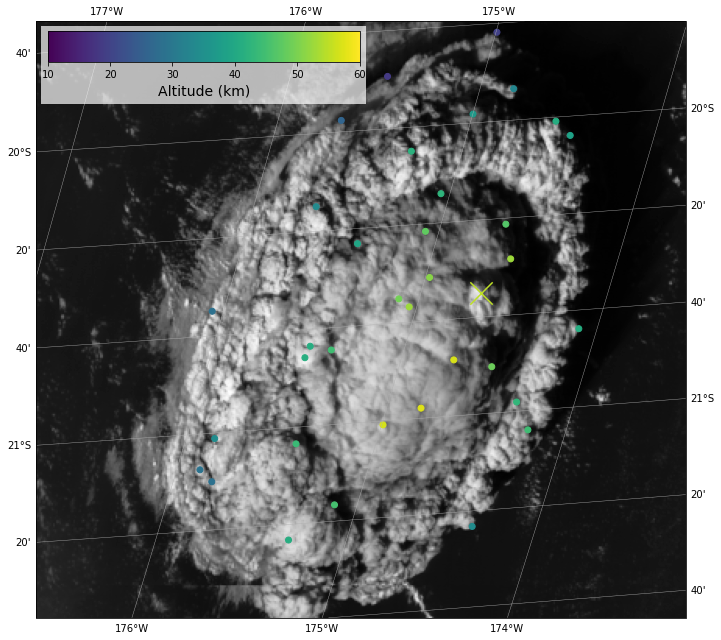

In [23]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1, 1, 1, projection=crs)

ax.set_global()
ax.imshow(pix_data, transform=crs, extent=crs.bounds, origin='upper', cmap='Greys_r')
ax.gridlines(draw_labels=True,
             dms=True,
             x_inline=False,
             y_inline=False,
             linewidth=0.4)

sc_plt = ax.scatter(pos_data['AHI_Lon'], pos_data['AHI_Lat'], c=pos_data['MeanH'], transform=ccrs.PlateCarree(), vmin=10, vmax=60)
sc_plt = ax.scatter(-174.6798, -20.5851, c=54.96, transform=ccrs.PlateCarree(), vmin=10, vmax=60, marker='x', s=500)
fig.tight_layout()

# Create the colour bar. This is a faff as matplotlib is not good at this
# First we create an inset axis, then another within that
# The outer axis enables a background colour to be used, which helps readability
ticks = np.linspace(10, 60, 6)
cbbox = inset_axes(ax, width="50%", height="13%", loc=2)
cbbox.set_xticks([])
cbbox.set_yticks([])
[cbbox.spines[k].set_visible(False) for k in cbbox.spines]
cbbox.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
# Make background white, but slightly transparent
cbbox.set_facecolor([1,1,1,0.7])

# Create the real colorbar axis within the above
cbaxes = inset_axes(cbbox, '96%', '40%', loc = 9)

# Add the actual colourbar now
cbar = plt.colorbar(sc_plt, cax=cbaxes, ticks=ticks, orientation='horizontal')
cbar.set_label("Altitude (km)", fontsize=14)
plt.savefig('./Figures/Fig2.eps', format='eps', facecolor='white', bbox_inches='tight')
plt.savefig('./Figures/Fig2.png', facecolor='white', bbox_inches='tight')

In [21]:
triple_data

,lat,lon,hgt
0,-20.5851,-174.6798,54.96
1,-22.2150,-175.5181,39.27
